

# Importing Libraries:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset:-

In [2]:
#Loading dataset:-

df=pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [5]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
#Checking the total rows and total columns:

print(df.shape)

(7752, 25)


# Exploratory Data Analysis(EDA):-

In [7]:
print("The shape of the dataset is:",df.shape)

The shape of the dataset is: (7752, 25)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


# Description:-

In [9]:
df.describe(include='all')

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
unique,NaN,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,30-06-2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,13.000000,NaN,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,NaN,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,NaN,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,NaN,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,NaN,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,NaN,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000


In [10]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [11]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


# Finding Null values:-

In [12]:
#checking null values in dataset:-

print(df.isna().sum())

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


# Removing Null values:

In [13]:
#Dropping all null values:
df=df.dropna()

df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

* All null values have been removed.

<Axes: >

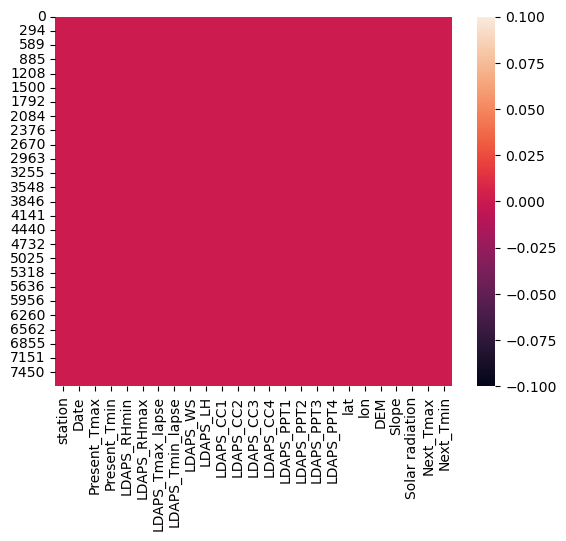

In [14]:
sns.heatmap(df.isnull())

# Data Analysis and Visualization:-

# Heatmap:

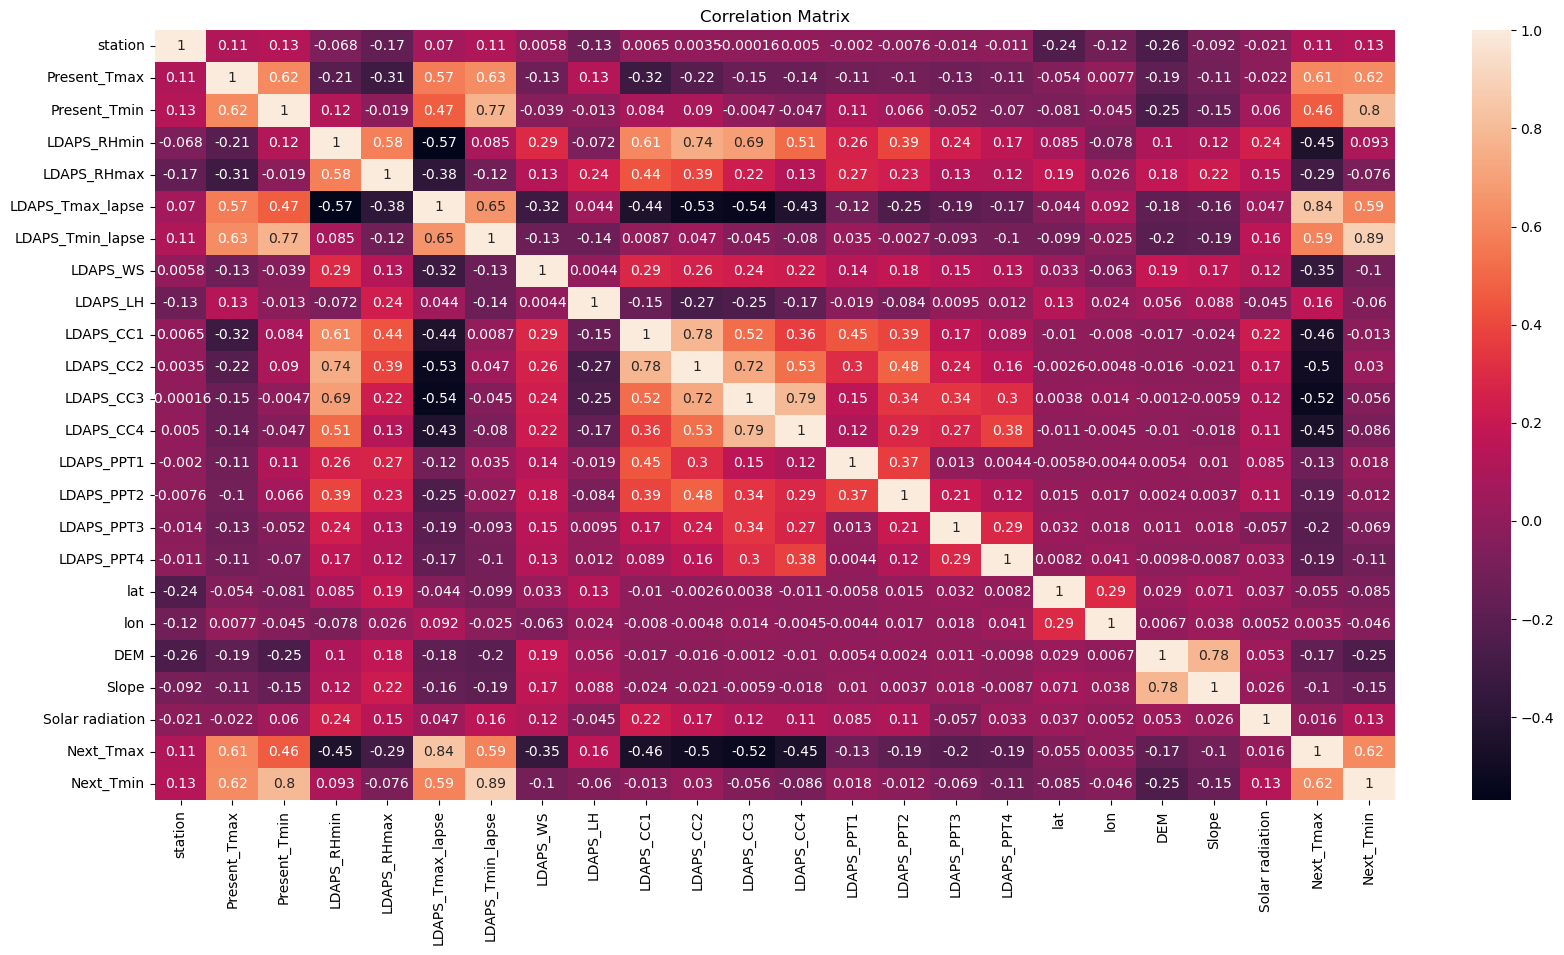

In [15]:
#Checking the correlation of all columns to each other:

plt.figure(figsize=[20,10])
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

* We can see here Present_Tmax and present_Tmin are highly correlated with Target variables, LDAPS_RHmin and LDAPS_RHmax are also highly correlated with target variables, Next_Tmin and Next_Tmax are also highly correlated with each other, most of the columns are negatively correlated with target varaibles.

In [16]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

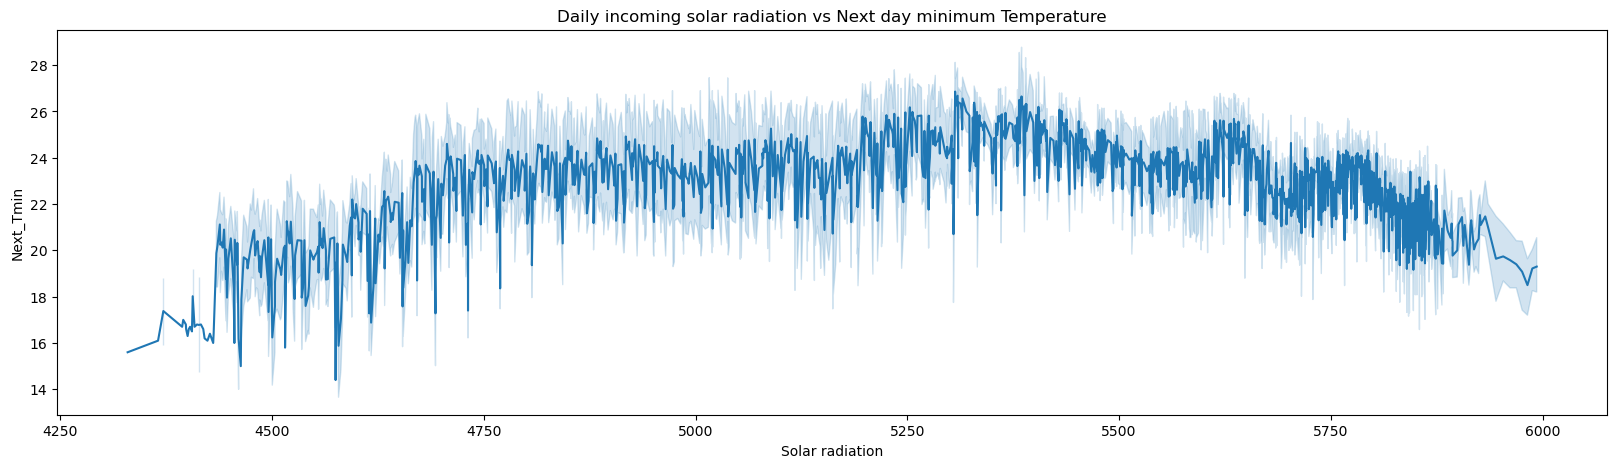

In [17]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation', y='Next_Tmin',data=df)
plt.show()

* Here we can see that, the next day minimum temperature is frequently increases.

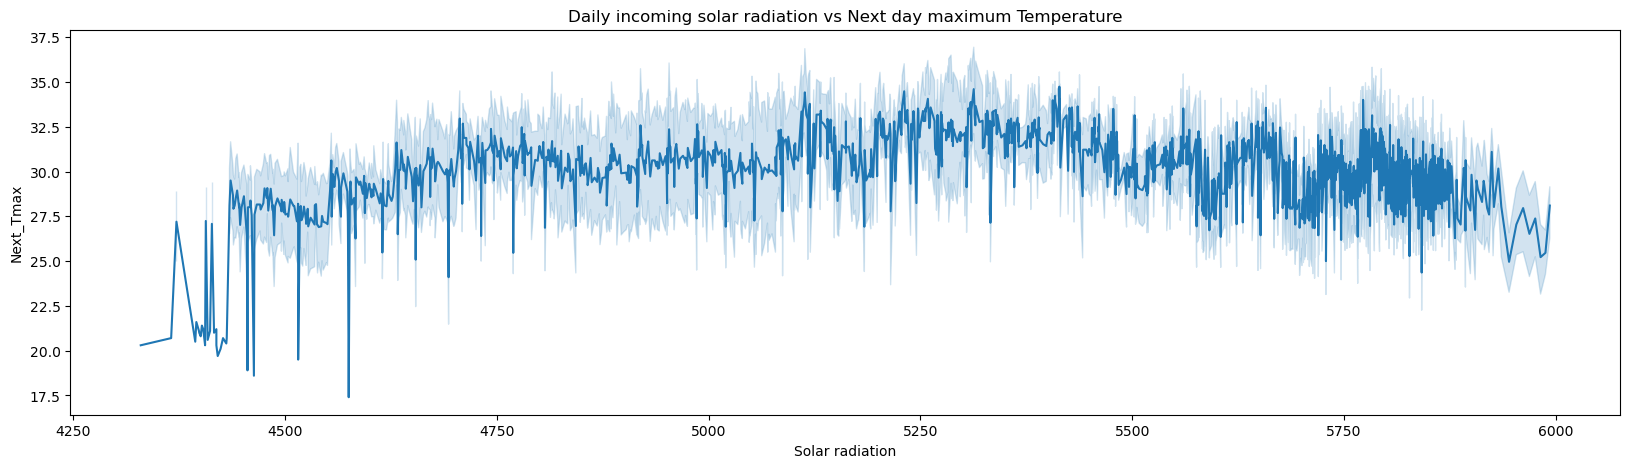

In [18]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation', y='Next_Tmax',data=df)
plt.show()

* Here, we can see that, the next day maximum temperature is frequently increases.

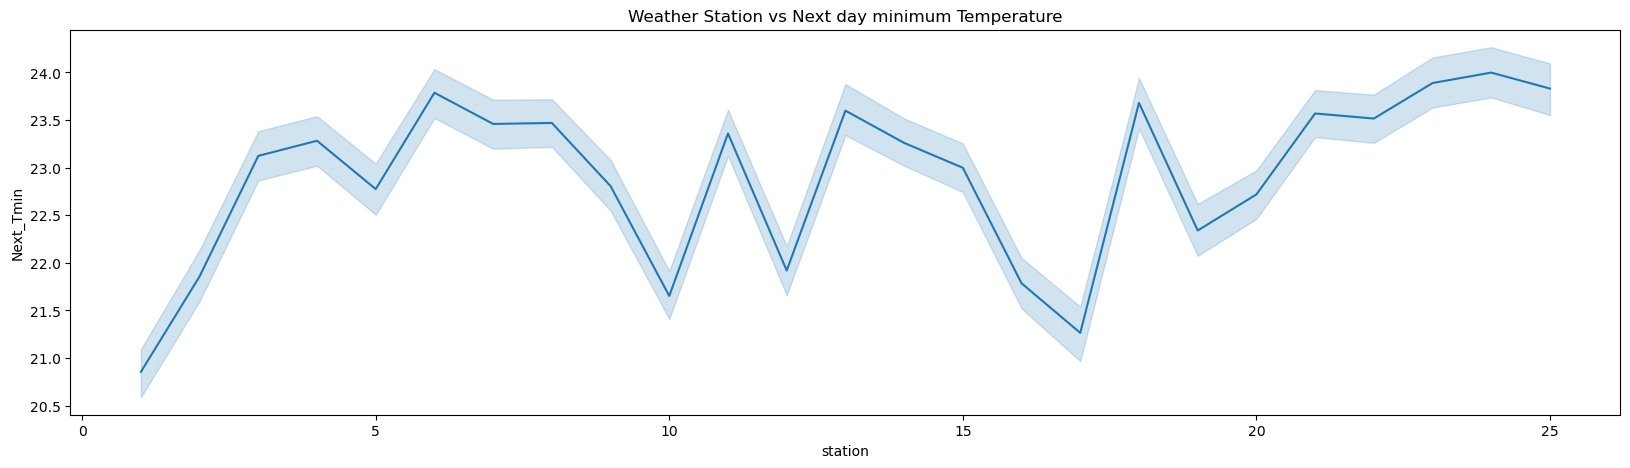

In [19]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station', y='Next_Tmin',data=df)
plt.show()

* Here, we can see that, the lineplot clears that next day minimum temperature is high and low at station 18 and 17 respectively.

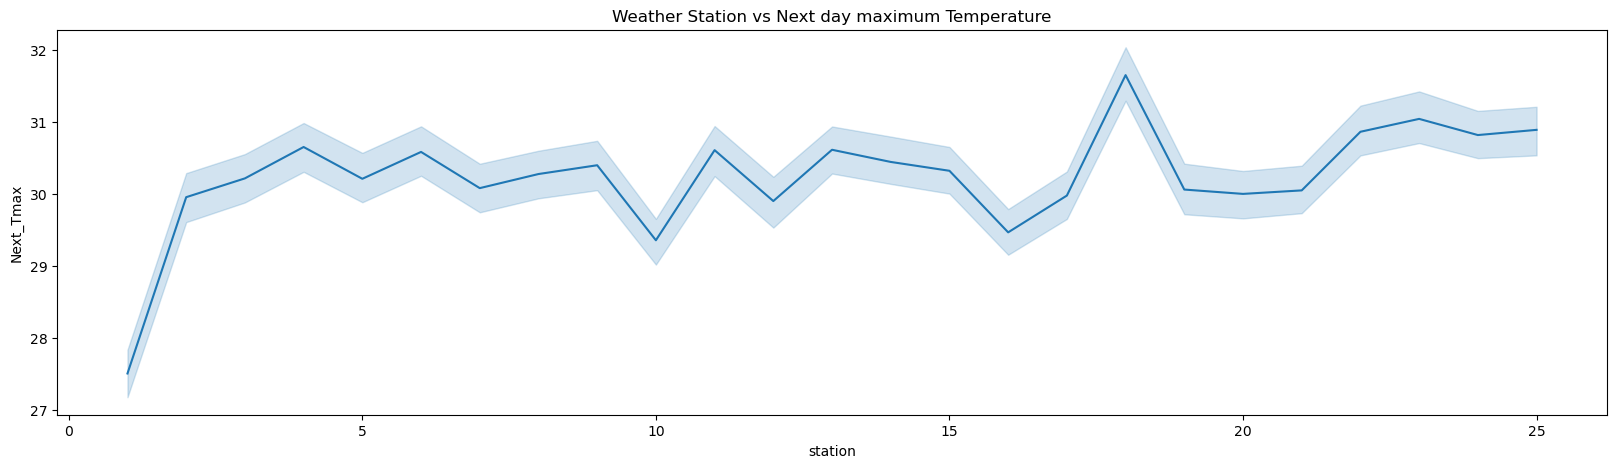

In [20]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station', y='Next_Tmax',data=df)
plt.show()

* Here, we can see that, the lineplot clears that next day minimum temperature is high and low at station 18 and 10 respectively.

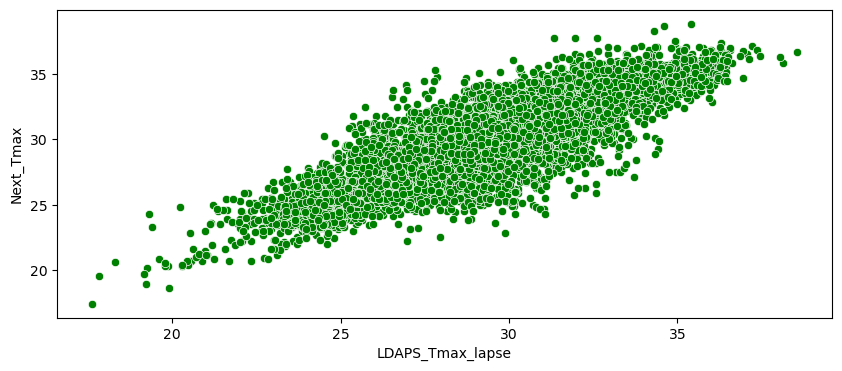

In [21]:

plt.figure(figsize=[10,4])
sns.scatterplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df,color='g')
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('Next_Tmax')
plt.show()

* As we can see that LDAPS_Tmax_lapse temp is also getting higher.

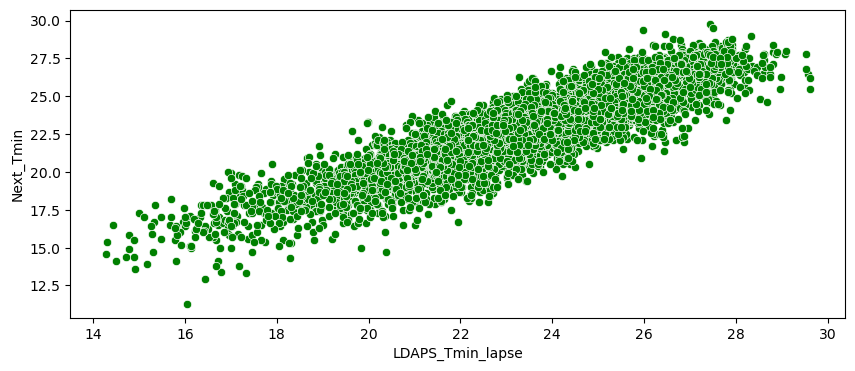

In [22]:
plt.figure(figsize=[10,4])
sns.scatterplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df,color='g')
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')
plt.show()

* As we can see that LDAPS_Tmin_lapse temp is also getting lower.

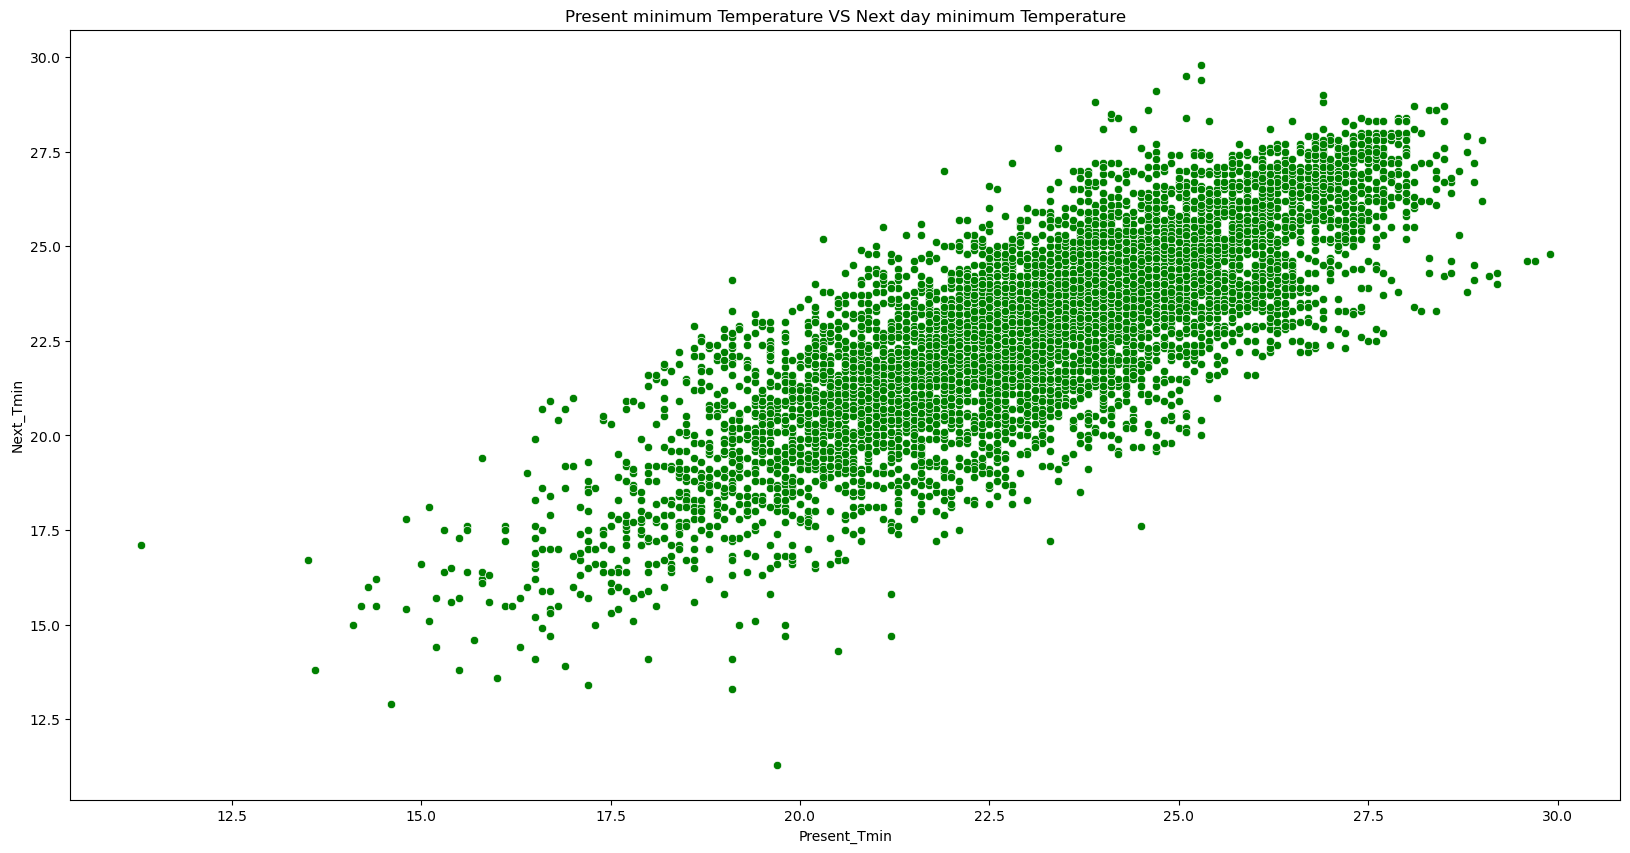

In [23]:
#Scatterplot Display distribution of data across Present minimum Temperature VS Next day minimum Temperature:

plt.figure(figsize=[20,10])
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',data=df,color='g')
plt.title('Present minimum Temperature VS Next day minimum Temperature')
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')
plt.show()

* Here we can notice when Present_Tmin in decreasing, Next_Tmin also getting Lower.

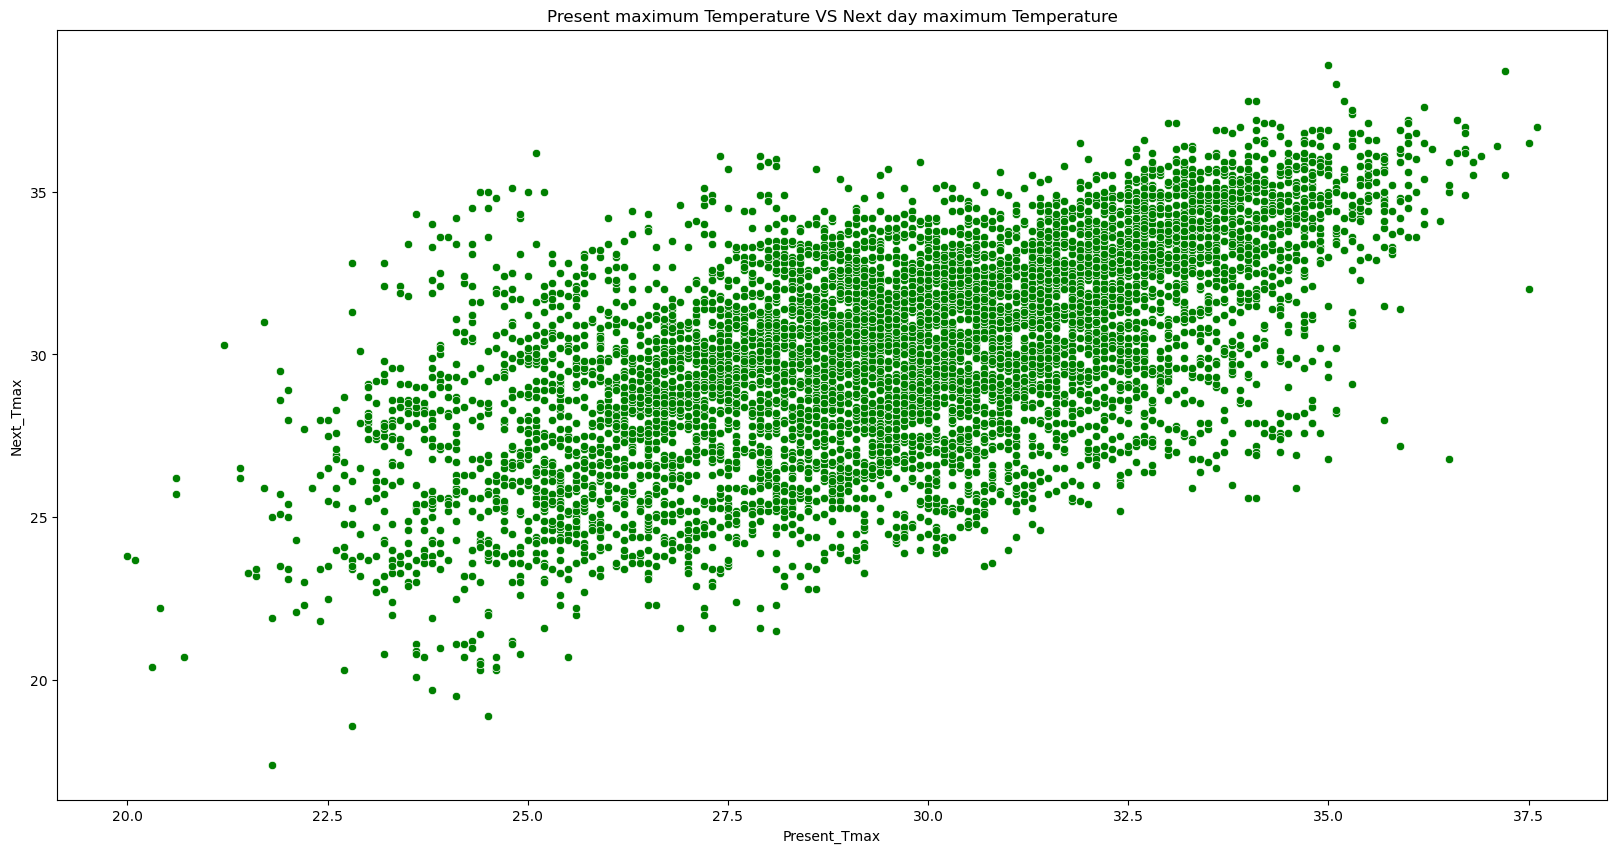

In [24]:
#Scatterplot Display distribution of data across Present maximum Temperature VS Next day maximum Temperature:

plt.figure(figsize=[20,10])
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',data=df,color='g')
plt.title('Present maximum Temperature VS Next day maximum Temperature')
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')
plt.show()

* Here we can notice when Present_Tmax in increasing, Next_Tmax also getting higher.

<Axes: title={'center': 'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

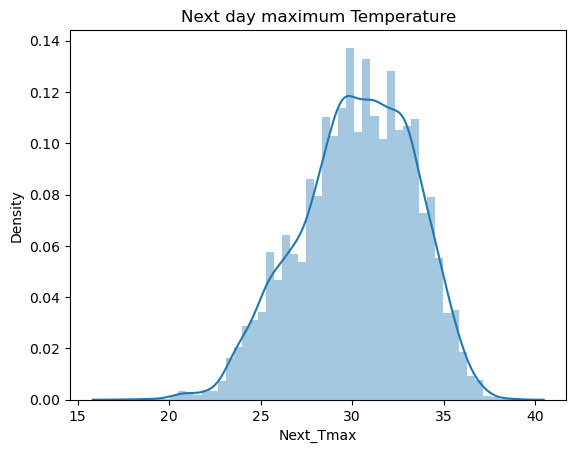

In [25]:
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

* The distplot clears that nexy day maximum temperature distribution is lies between 22 to 37.

<Axes: title={'center': 'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

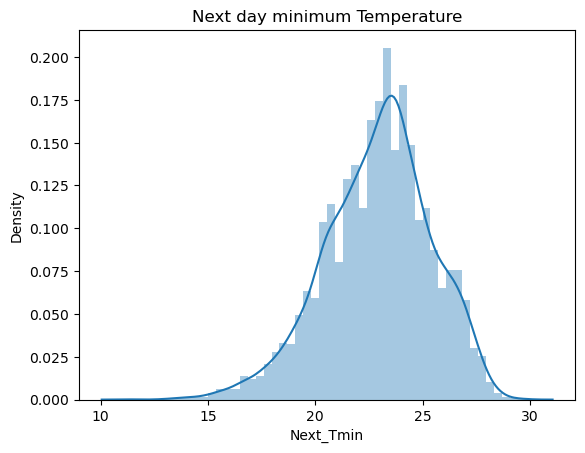

In [26]:
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

* The distplot clears that nexy day minimum temperature distribution is lies between 15 to 28.

In [27]:
df['Date'].unique()

array(['30-06-2013', '01-07-2013', '02-07-2013', '03-07-2013',
       '04-07-2013', '05-07-2013', '06-07-2013', '07-07-2013',
       '08-07-2013', '09-07-2013', '10-07-2013', '11-07-2013',
       '12-07-2013', '13-07-2013', '14-07-2013', '15-07-2013',
       '16-07-2013', '17-07-2013', '18-07-2013', '19-07-2013',
       '20-07-2013', '21-07-2013', '22-07-2013', '23-07-2013',
       '24-07-2013', '25-07-2013', '26-07-2013', '27-07-2013',
       '28-07-2013', '29-07-2013', '30-07-2013', '31-07-2013',
       '01-08-2013', '02-08-2013', '03-08-2013', '04-08-2013',
       '05-08-2013', '06-08-2013', '07-08-2013', '08-08-2013',
       '09-08-2013', '11-08-2013', '12-08-2013', '13-08-2013',
       '14-08-2013', '15-08-2013', '16-08-2013', '17-08-2013',
       '18-08-2013', '19-08-2013', '20-08-2013', '21-08-2013',
       '22-08-2013', '23-08-2013', '24-08-2013', '25-08-2013',
       '26-08-2013', '27-08-2013', '28-08-2013', '29-08-2013',
       '30-08-2013', '30-06-2014', '01-07-2014', '02-07

In [28]:
import datetime as ddt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(ddt.datetime.toordinal)

In [29]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [30]:
df['Date'].unique()

array([735049, 734875, 734906, 734934, 734965, 734995, 735026, 735056,
       735087, 735118, 735148, 735179, 735209, 735062, 735063, 735064,
       735065, 735066, 735067, 735068, 735069, 735070, 735071, 735072,
       735073, 735074, 735075, 735076, 735077, 735078, 735079, 735080,
       734876, 734907, 734935, 734966, 734996, 735027, 735057, 735088,
       735119, 735180, 735210, 735093, 735094, 735095, 735096, 735097,
       735098, 735099, 735100, 735101, 735102, 735103, 735104, 735105,
       735106, 735107, 735108, 735109, 735110, 735414, 735240, 735271,
       735299, 735330, 735360, 735391, 735421, 735452, 735483, 735513,
       735544, 735574, 735427, 735428, 735429, 735430, 735431, 735432,
       735433, 735434, 735435, 735436, 735437, 735438, 735439, 735440,
       735441, 735442, 735443, 735444, 735445, 735241, 735272, 735300,
       735331, 735361, 735392, 735422, 735453, 735484, 735514, 735545,
       735575, 735458, 735459, 735460, 735461, 735462, 735463, 735464,
      

# Apply ordinal encoder:-

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
enc=OrdinalEncoder()
df['Date']=enc.fit_transform(df[['Date']])

In [33]:
df.dtypes

station             float64
Date                float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# Outliers Handling:

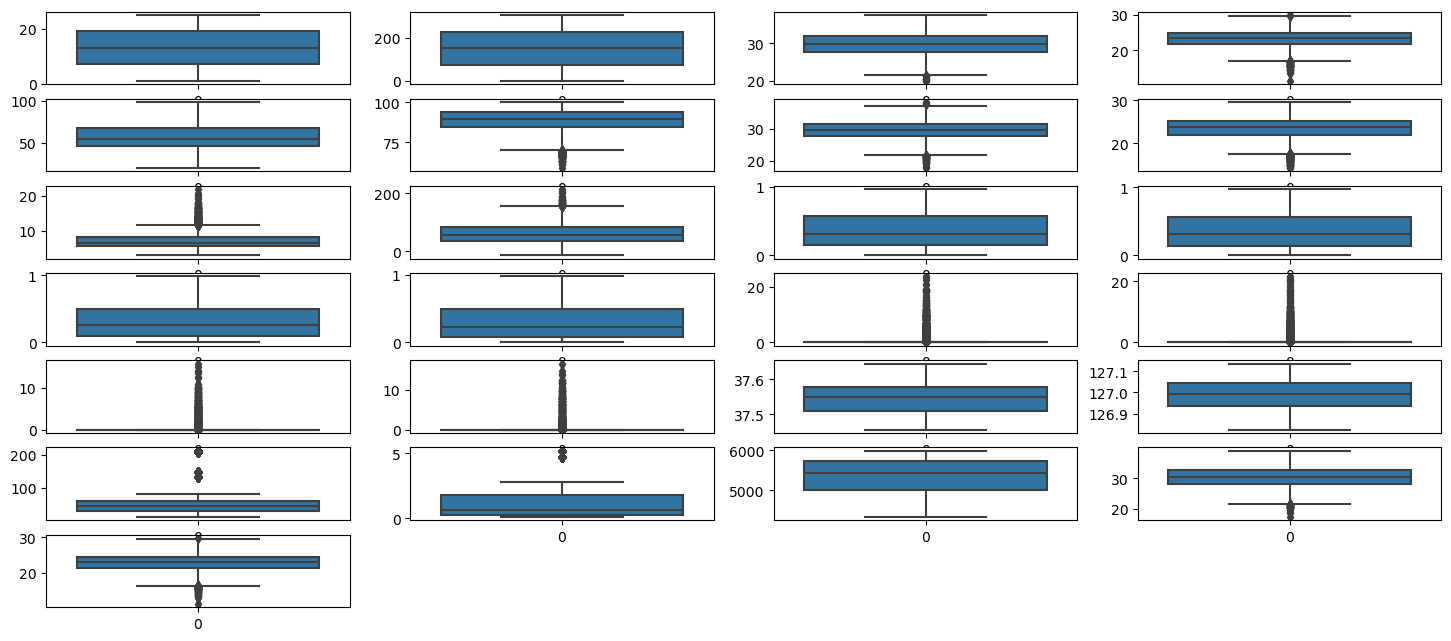

In [34]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

# Removing Outliers:

In [35]:
import scipy.stats as stats
from scipy.stats import zscore

In [36]:
#z score method:

z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df_new=df[(z<3).all(axis=1)]
df_new

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,12.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,12.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,12.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,12.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,12.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,298.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,298.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,298.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,298.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [37]:
#Checking shape of new dataset:
df_new.shape

(6739, 25)

In [38]:
#Checking shape of old dataset:
df.shape

(7588, 25)

# Checking for skewness:

In [39]:
df_new.skew()

station            -0.001594
Date                0.012297
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

# Skewness Handling:

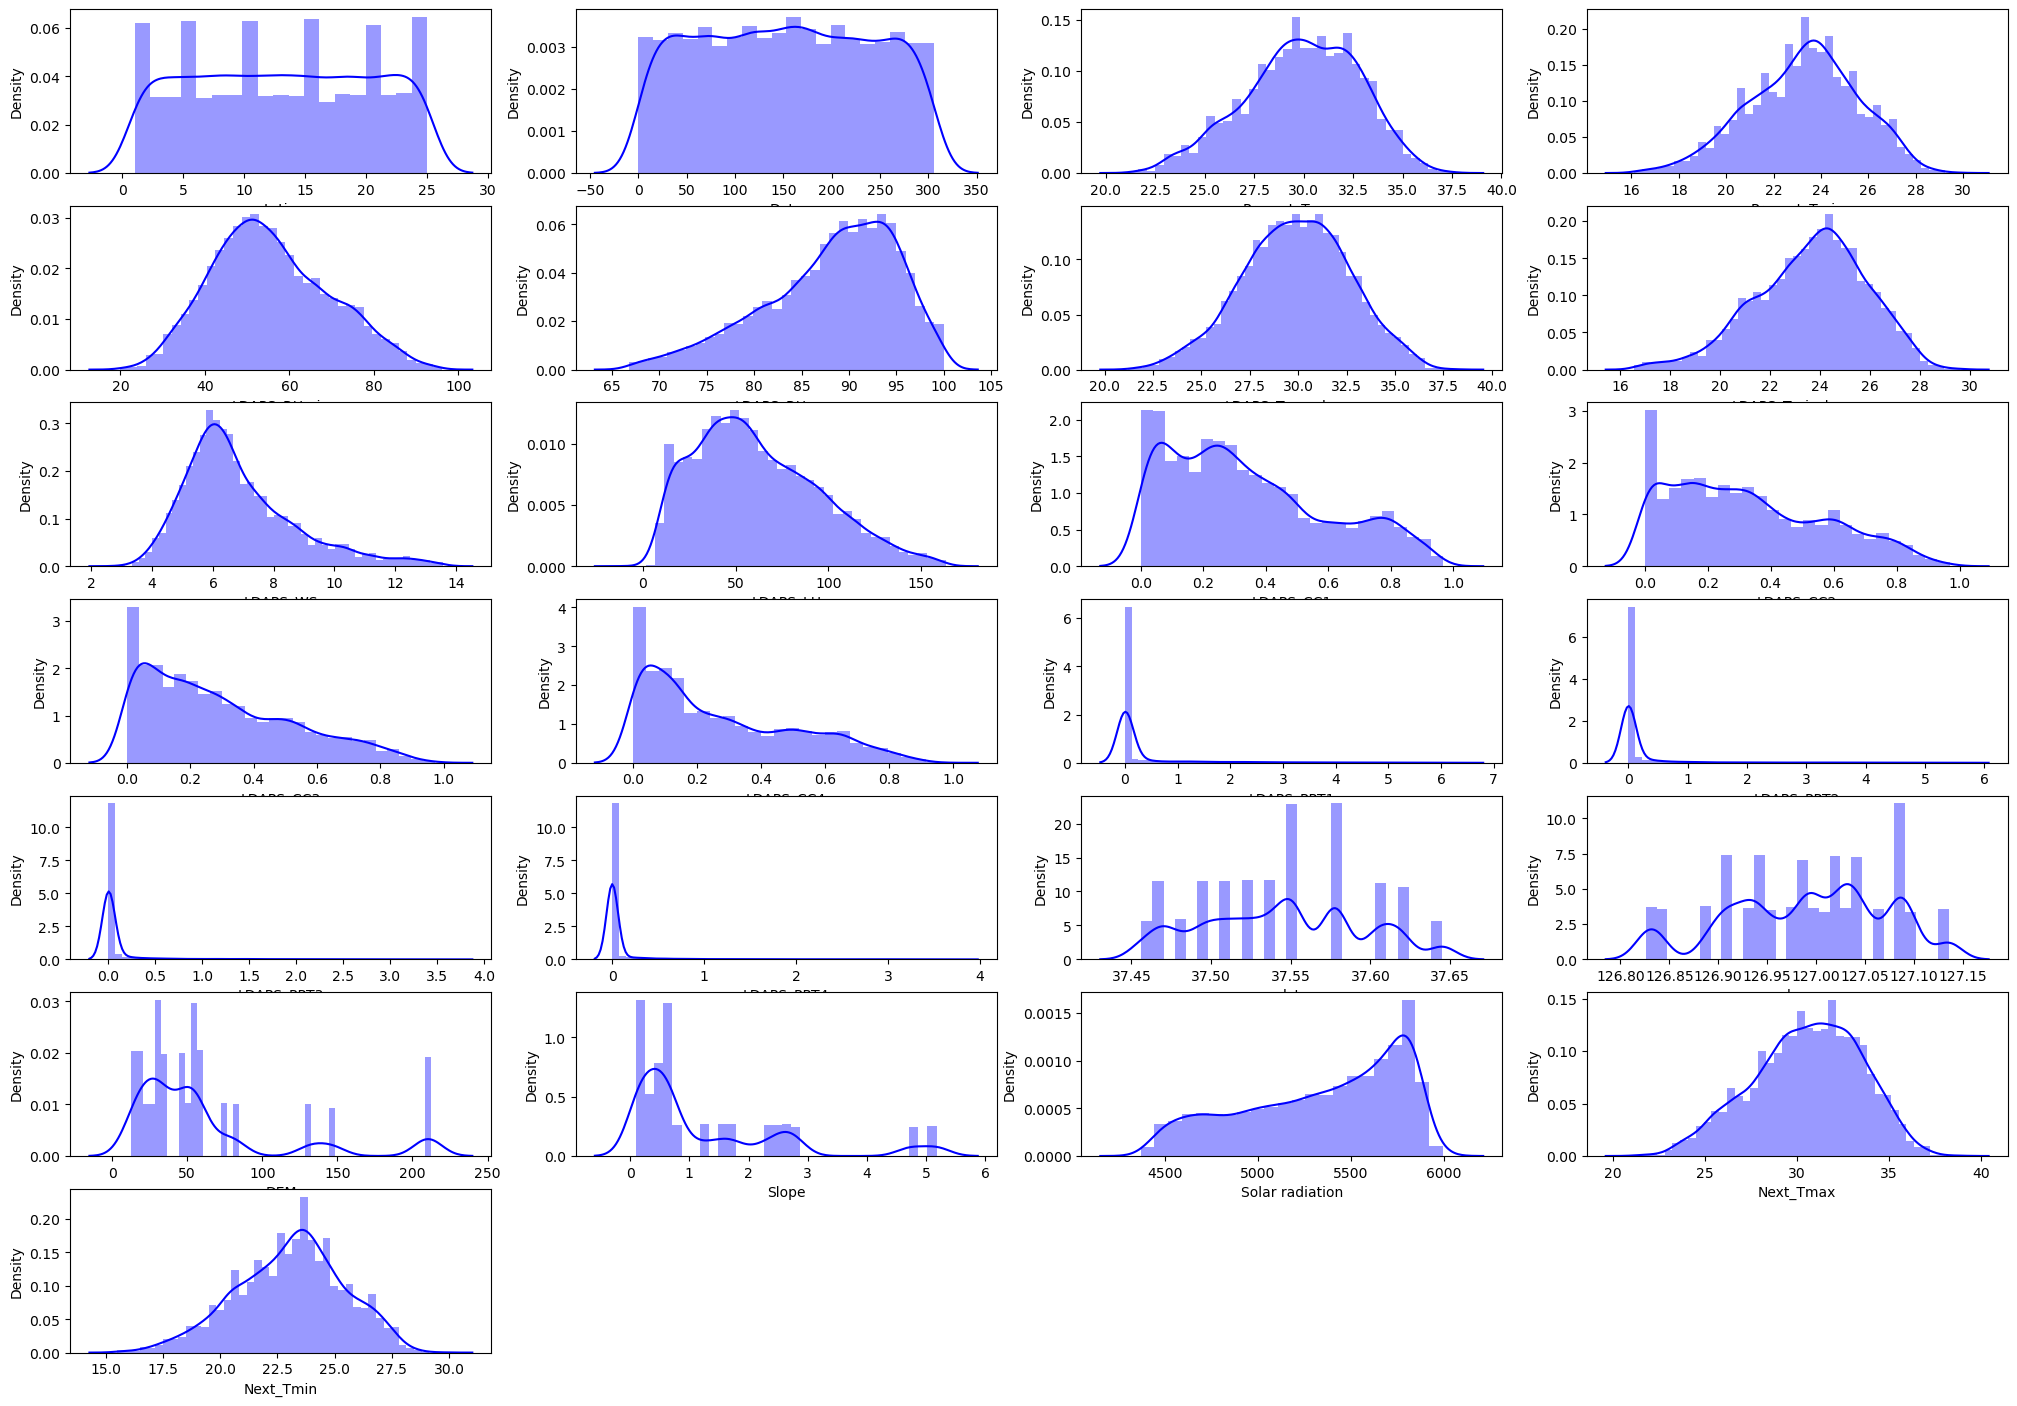

In [40]:
plt.figure(figsize=(25,20))
for i in enumerate(df_new.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df_new[i[1]],color='b')

* Skewness more than +/-0.5 will be treated.

In [41]:
#Removing skewness of the data:

from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df_new.columns:
    if abs(df_new.loc[:,i].skew())>0.5:
        df_new.loc[:,i]=PT.fit_transform(df_new.loc[:,i].values.reshape(-1,1))

In [42]:
df_new.skew()

station            -0.001594
Date                0.012297
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.065308
LDAPS_CC2           0.050023
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

* As we can see here skewness is removed.This best result we got. 

# Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label:

# 1. Machine learning Model Building For Next_Tmax:

In [43]:
x=df_new.drop('Next_Tmax',axis=1) #List of all feature
y=df_new['Next_Tmax'] #Label

print(x.shape)
print(y.shape)

(6739, 24)
(6739,)


In [44]:
x.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,1.0,12.0,28.7,21.4,58.255688,0.348222,28.074101,23.006936,0.176871,0.349992,...,-0.52537,-0.484794,-0.461889,-0.414444,37.6046,126.991,1.854393,1.327776,1.891687,21.2
1,2.0,12.0,31.9,21.6,52.263397,0.261118,29.850689,24.035009,-0.574617,-0.166810,...,-0.52537,-0.484794,-0.461889,-0.414444,37.6046,127.032,0.069704,-0.375858,1.431077,22.5
2,3.0,12.0,31.6,23.3,48.690479,-0.717348,30.091292,24.565633,-0.252083,-1.378337,...,-0.52537,-0.484794,-0.461889,-0.414444,37.5776,127.058,-0.353433,-0.944115,1.410511,23.9
3,4.0,12.0,32.0,23.4,58.239788,1.375094,29.704629,23.326177,-0.606795,0.245926,...,-0.52537,-0.484794,-0.461889,-0.414444,37.6450,127.022,0.098766,1.249133,1.387059,24.3
4,5.0,12.0,31.4,21.9,56.174095,0.186035,29.113934,23.486480,-0.541825,1.298111,...,-0.52537,-0.484794,-0.461889,-0.414444,37.5507,127.135,-0.278815,-0.392364,1.396254,22.5


In [45]:
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

# Feature Scaling:-

In [46]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.672719,-1.598273,-0.425704,-0.814460,0.195915,0.348222,-0.662498,-0.289928,0.176871,0.349992,...,-0.52537,-0.484794,-0.461889,-0.414444,1.211166,0.002925,1.854393,1.327776,1.891687,-0.790587
1,-1.533959,-1.598273,0.690215,-0.727785,-0.236604,0.261118,-0.016693,0.171379,-0.574617,-0.166810,...,-0.52537,-0.484794,-0.461889,-0.414444,1.211166,0.518733,0.069704,-0.375858,1.431077,-0.239151
2,-1.395198,-1.598273,0.585598,0.008945,-0.494494,-0.717348,0.070769,0.409475,-0.252083,-1.378337,...,-0.52537,-0.484794,-0.461889,-0.414444,0.671467,0.845830,-0.353433,-0.944115,1.410511,0.354704
3,-1.256438,-1.598273,0.725088,0.052282,0.194767,1.375094,-0.069787,-0.146681,-0.606795,0.245926,...,-0.52537,-0.484794,-0.461889,-0.414444,2.018714,0.392926,0.098766,1.249133,1.387059,0.524376
4,-1.117678,-1.598273,0.515853,-0.597774,0.045667,0.186035,-0.284509,-0.074752,-0.541825,1.298111,...,-0.52537,-0.484794,-0.461889,-0.414444,0.133768,1.814542,-0.278815,-0.392364,1.396254,-0.239151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,1.102482,1.663524,-2.378563,-2.374595,-2.226900,-1.363447,-0.757521,-2.400625,0.048293,-2.013062,...,-0.52537,-0.484794,-0.461889,-0.414444,0.133768,0.619378,-0.712912,-0.269357,-1.763704,-2.275223
6735,1.241243,1.663524,-2.587798,-2.547943,-1.836710,-0.753410,-1.160213,-2.620034,-0.516916,0.685720,...,-0.52537,-0.484794,-0.461889,-0.414444,-0.675779,1.198089,-0.999559,-1.353609,-1.781247,-2.529732
6736,1.380003,1.663524,-2.308818,-2.677955,-2.078766,-1.302260,-1.288468,-2.188536,-0.244791,0.421213,...,-0.52537,-0.484794,-0.461889,-0.414444,-0.136081,-1.255142,-1.576584,-1.278502,-1.779394,-2.105550
6737,1.518763,1.663524,-2.308818,-2.417932,-2.273699,-1.457152,-1.049238,-2.207453,0.011101,-0.319269,...,-0.52537,-0.484794,-0.461889,-0.414444,-0.405930,-1.028689,-1.397502,-1.069018,-1.785446,-1.808623


* So here scaled the data using standard scalarization method to overcome with the issue of data biasness.

# Multicollinearity using Variance_inflation_factor:-

In [47]:
import statsmodels

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['Features']=X.columns
vif

,vif,Features
0,1.290615,station
1,1.131875,Date
2,2.812043,Present_Tmax
3,3.363004,Present_Tmin
4,6.028790,LDAPS_RHmin
5,2.586263,LDAPS_RHmax
6,6.829228,LDAPS_Tmax_lapse
7,8.769869,LDAPS_Tmin_lapse
8,1.222770,LDAPS_WS
9,1.493915,LDAPS_LH


# Machine Learning model building:

In [50]:
#import libraries:-
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression

In [51]:
#Creating the Training and Testing data sets:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True)

In [52]:
X_train.shape

(5054, 24)

In [53]:
y_train.shape

(5054,)

In [54]:
X_test.shape

(1685, 24)

In [55]:
y_test.shape

(1685,)

# Linear Regression:-

In [56]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
pred_train=lr.predict(X_train)
print('R2_score:',r2_score(y_test,pred_lr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_score: 0.7710160392047394
R2_score on training data: 78.94145611694441
Mean Absolute Error: 1.068576599763507
Mean Squared Error: 1.9492453777559118
Root Mean Squared Error: 1.3961537801244932


# Decision Tree Regressor:-

In [57]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred_DTR=DTR.predict(X_test)
pred_train=DTR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_DTR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_DTR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score: 0.7712369348131844
R2_score on training data: 100.0
Mean Absolute Error: 1.021186943620178
Mean Squared Error: 1.9473649851632044
Root Mean Squared Error: 1.3954801987714496


# Random forest Regressor:-

In [58]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)
pred_train=rf.predict(X_train)
print('R2_score:',r2_score(y_test,pred_rf))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rf))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rf)))

R2_score: 0.8986421423605682
R2_score on training data: 98.64652233366853
Mean Absolute Error: 0.6905258160237386
Mean Squared Error: 0.8628173554896135
Root Mean Squared Error: 0.9288796237885798


# SVR using linear kernel:-

In [59]:
linear=SVR(kernel='linear')
linear.fit(X_train,y_train)
pred_linear=linear.predict(X_test)
pred_train=linear.predict(X_train)
print('R2_score:',r2_score(y_test,pred_linear))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_linear))
print('Mean Squared Error:',mean_squared_error(y_test,pred_linear))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_linear)))

R2_score: 0.7694924446191729
R2_score on training data: 78.67699772769086
Mean Absolute Error: 1.0594846395698538
Mean Squared Error: 1.9622151058240918
Root Mean Squared Error: 1.4007908858298914


# SVR using poly kernel:-

In [60]:
poly=SVR(kernel='poly')
poly.fit(X_train,y_train)
pred_poly=poly.predict(X_test)
pred_train=poly.predict(X_train)
print('R2_score:',r2_score(y_test,pred_poly))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_poly))
print('Mean Squared Error:',mean_squared_error(y_test,pred_poly))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_poly)))

R2_score: 0.8413057935786591
R2_score on training data: 88.19633620797683
Mean Absolute Error: 0.8710980244097093
Mean Squared Error: 1.3508978850270796
Root Mean Squared Error: 1.1622813278320698


# SVR using rbf kernel:-

In [61]:
rbf=SVR(kernel='rbf')
rbf.fit(X_train,y_train)
pred_rbf=rbf.predict(X_test)
pred_train=rbf.predict(X_train)
print('R2_score:',r2_score(y_test,pred_rbf))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rbf))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rbf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rbf)))

R2_score: 0.86878355417132
R2_score on training data: 90.39662688162495
Mean Absolute Error: 0.7650228087999128
Mean Squared Error: 1.116991118630381
Root Mean Squared Error: 1.056878005557113


# KNeighbors Regressor:-

In [62]:
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)
pred_KNN=KNN.predict(X_test)
pred_train=KNN.predict(X_train)
print('R2_score:',r2_score(y_test,pred_KNN))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_KNN))
print('Mean Squared Error:',mean_squared_error(y_test,pred_KNN))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2_score: 0.8555711546832431
R2_score on training data: 90.91805610269682
Mean Absolute Error: 0.8413293768545993
Mean Squared Error: 1.2294627893175074
Root Mean Squared Error: 1.1088114309103723


# AdaBoostRegressor:-

In [63]:
ABR=AdaBoostRegressor()
ABR.fit(X_train,y_train)
pred_ABR=ABR.predict(X_test)
pred_train=ABR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_ABR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ABR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ABR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ABR)))

R2_score: 0.7673778759535002
R2_score on training data: 78.66365854606308
Mean Absolute Error: 1.1500579108192972
Mean Squared Error: 1.980215550847381
Root Mean Squared Error: 1.40720131852105


# GradientBoostingRegressor:-

In [64]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred_GBR=GBR.predict(X_test)
pred_train=GBR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.8546108945558304
R2_score on training data: 88.90808706822574
Mean Absolute Error: 0.8575593408030759
Mean Squared Error: 1.2376370850555225
Root Mean Squared Error: 1.1124913865084631


# SGD Regressor:-

In [65]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(X_train,y_train)
pred_SGD=SGD.predict(X_test)
pred_train=SGD.predict(X_train)
print('R2_score:',r2_score(y_test,pred_SGD))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_SGD))
print('Mean Squared Error:',mean_squared_error(y_test,pred_SGD))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_SGD)))

R2_score: 0.770317440357526
R2_score on training data: 78.7809604491654
Mean Absolute Error: 1.071386547911992
Mean Squared Error: 1.9551922596646132
Root Mean Squared Error: 1.3982818956364318


# Lasso Regressor:-

In [66]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(X_train,y_train)
print(Z.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [67]:
LS=Lasso(alpha=0.001,random_state=0)
LS.fit(X_train,y_train)
pred_LS=LS.predict(X_test)
pred_train=LS.predict(X_train)
print('R2_score:',r2_score(y_test,pred_LS))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_LS))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LS))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LS))) 

R2_score: 0.7710091239460973
R2_score on training data: 78.94031077847396
Mean Absolute Error: 1.0683772939323286
Mean Squared Error: 1.9493042444813242
Root Mean Squared Error: 1.3961748617137197


# Ridge Regressor:-

In [68]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(X_train,y_train)
print(Z1.best_params_)

{'alpha': 1, 'solver': 'lsqr'}


In [69]:
RD=Ridge(alpha=1,solver='lsqr')
RD.fit(X_train,y_train)
pred_RD=RD.predict(X_test)
pred_train=RD.predict(X_train)
print('R2_score:',r2_score(y_test,pred_RD))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RD))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RD))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RD)))

R2_score: 0.7710194169208275
R2_score on training data: 78.9414364185442
Mean Absolute Error: 1.0685710905383852
Mean Squared Error: 1.949216624661375
Root Mean Squared Error: 1.3961434828345456


# Bagging Regressor:

In [70]:
from sklearn.ensemble import BaggingRegressor

BR=BaggingRegressor()
BR.fit(X_train,y_train)
pred_BR=BR.predict(X_test)
pred_train=BR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_BR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_BR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_BR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_BR)))

R2_score: 0.8722680397838675
R2_score on training data: 97.86916311784549
Mean Absolute Error: 0.7713827893175073
Mean Squared Error: 1.0873291394658748
Root Mean Squared Error: 1.0427507561569422


# Checking the cross validation score:

In [71]:
from sklearn.model_selection import KFold,cross_val_score

In [72]:
#Checking cv score for Linear Regression:

print(cross_val_score(lr,X,y,cv=5).mean())

0.6931874327310199


In [73]:
#Checking cv score for Decision Tree Regressor:

print(cross_val_score(DTR,X,y,cv=5).mean())

0.4348526077054765


In [74]:
#Checking cv score for Random Forest Regressor:

print(cross_val_score(rf,X,y,cv=5).mean())

0.6915644017452844


In [75]:
#Checking cv score for SVR(Linear) Regressor:

print(cross_val_score(linear,X,y,cv=5).mean())

0.7080232647283611


In [76]:
#Checking cv score for SVR(poly) Regressor:

print(cross_val_score(poly,X,y,cv=5).mean())

0.6091909231024394


In [77]:
#Checking cv score for SVR(rbf) Regressor:

print(cross_val_score(rbf,X,y,cv=5).mean())

0.6700103551392158


In [78]:
#Checking cv score for Kneighbors Regressor:

print(cross_val_score(KNN,X,y,cv=5).mean())

0.5362190848865517


In [79]:
#Checking cv score for AdaBoost Regressor:

print(cross_val_score(ABR,X,y,cv=5).mean())

0.6564858664575779


In [80]:
#Checking cv score for Gradient Boosting Regressor:

print(cross_val_score(GBR,X,y,cv=5).mean())

0.714972255047542


In [81]:
#Checking cv score for SGD Regressor:

print(cross_val_score(SGD,X,y,cv=5).mean())

0.6933752780870306


In [82]:
#Checking cv score for Lasso Regressor:

print(cross_val_score(LS,X,y,cv=5).mean())

0.6938074277633802


In [83]:
#Checking cv score for Ridge Regressor:

print(cross_val_score(RD,X,y,cv=5).mean())

0.6932448434236067


In [84]:
#Checking cv score for Bagging Regressor:

print(cross_val_score(BR,X,y,cv=5).mean())

0.6607993074178667


# Final Selected Model with higher R2 score:

In [86]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)
pred_train=rf.predict(X_train)
print('R2_score:',r2_score(y_test,pred_rf))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rf))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rf)))

R2_score: 0.8992829524428535
R2_score on training data: 98.68392225062036
Mean Absolute Error: 0.6917667655786345
Mean Squared Error: 0.8573624053412457
Root Mean Squared Error: 0.9259386617596469


# Hyper Parameter Tuning on best model for Next_Tmax  :-

In [87]:
#Importing necessary libraries:-
from sklearn.model_selection import GridSearchCV

param_grid= {'n_estimators':[0,200],
            'max_depth':[2,3,4,6],
            'min_samples_split':[2,5],
            'min_samples_leaf':[1,2]}

In [88]:
grid= GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [89]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [2, 3, 4, 6], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [0, 200]},
             verbose=2)

In [90]:
print("Best score:",grid.best_score_)
print("Best estimator:",grid.best_estimator_)
print("Best parameters:",grid.best_params_)

Best score: 0.8117310982239134
Best estimator: RandomForestRegressor(max_depth=6, min_samples_split=5, n_estimators=200)
Best parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [91]:
rf_final=RandomForestRegressor(max_depth=6,min_samples_leaf=2,min_samples_split=5,n_estimators=200,random_state=42)

rf_final.fit(X_train,y_train)
pred_rf_final=rf_final.predict(X_test)
pred_train=rf_final.predict(X_train)
print('R2_score:',r2_score(y_test,pred_rf_final))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rf_final))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rf_final))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rf_final)))

R2_score: 0.8076032826601781
R2_score on training data: 84.69199791345015
Mean Absolute Error: 1.0031944873592042
Mean Squared Error: 1.6377933662584312
Root Mean Squared Error: 1.2797630117558607


#After tweaking parameters we are getting the best r2_score is 0.8075 which is less than the accuracy score of RandomForestRegressor(0.8987) without hyper parameter tunning,so lets save the model in by default rf model.

# Prediction Result for Next_Tmax:-

In [92]:
results=pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree','Random Forest','SVR using Linear','SVR using Poly','SVR using rbf','KNeighbors','Gradient Boosting','AdaBoost','SGD','Lasso','Ridge','Bagging'],
    'Score': [0.7693,0.7726,0.8987,0.7684,0.8399,0.8646,0.8529,0.7585,0.8543,0.7675,0.7693,0.7693,0.8883]})

result_Tmax=results.sort_values(by='Score',ascending=False)
result_Tmax=result_Tmax.set_index('Score')
result_Tmax

,Model
Score,
0.8987,Random Forest
0.8883,Bagging
0.8646,SVC using rbf
0.8543,AdaBoost
0.8529,KNeighbors
0.8399,SVC using Poly
0.7726,Decision Tree
0.7693,Linear Regression
0.7693,Lasso


# Conclusion:

* The result clearly demonstrate that the RandomForestRegressor algorithm outperforms the other methods,achieving the highest R2 Score among all evaluated Regressors.

* Bagging, SVC using rbf , AdaBoost and Kneighbors also performed admirably, showing competitive performance with an r2 score close RandomForestRegressor.

* however, Gradient Boosting exhibited relatively lower accuracies, indicating that they might not be the best choices for this specific dataset.

# Saving My Best Model:-

In [93]:
#From sklearn.externals import joblib
import joblib

In [94]:
#Save the model as a object file:
joblib.dump(rf,'rffile.obj')

['rffile.obj']

In [95]:
#Load the model from the file:
rf_from_joblib=joblib.load('rffile.obj')

In [96]:
#Use the loaded model to make predictions:
rf_from_joblib.predict(X_test)

array([29.641, 29.693, 32.373, ..., 28.184, 25.703, 34.885])

# 2. Machine learning Model Building For Next_Tmin:

In [97]:
x=df_new.drop('Next_Tmin',axis=1) #List of all feature
y=df_new['Next_Tmin'] #Label

print(x.shape)
print(y.shape)

(6739, 24)
(6739,)


In [98]:
x.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,1.0,12.0,28.7,21.4,58.255688,0.348222,28.074101,23.006936,0.176871,0.349992,...,-0.52537,-0.484794,-0.461889,-0.414444,37.6046,126.991,1.854393,1.327776,1.891687,29.1
1,2.0,12.0,31.9,21.6,52.263397,0.261118,29.850689,24.035009,-0.574617,-0.166810,...,-0.52537,-0.484794,-0.461889,-0.414444,37.6046,127.032,0.069704,-0.375858,1.431077,30.5
2,3.0,12.0,31.6,23.3,48.690479,-0.717348,30.091292,24.565633,-0.252083,-1.378337,...,-0.52537,-0.484794,-0.461889,-0.414444,37.5776,127.058,-0.353433,-0.944115,1.410511,31.1
3,4.0,12.0,32.0,23.4,58.239788,1.375094,29.704629,23.326177,-0.606795,0.245926,...,-0.52537,-0.484794,-0.461889,-0.414444,37.6450,127.022,0.098766,1.249133,1.387059,31.7
4,5.0,12.0,31.4,21.9,56.174095,0.186035,29.113934,23.486480,-0.541825,1.298111,...,-0.52537,-0.484794,-0.461889,-0.414444,37.5507,127.135,-0.278815,-0.392364,1.396254,31.2


In [99]:
y.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

# Feature Scaling:-

In [100]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-1.672719,-1.598273,-0.425704,-0.814460,0.195915,0.348222,-0.662498,-0.289928,0.176871,0.349992,...,-0.52537,-0.484794,-0.461889,-0.414444,1.211166,0.002925,1.854393,1.327776,1.891687,-0.489951
1,-1.533959,-1.598273,0.690215,-0.727785,-0.236604,0.261118,-0.016693,0.171379,-0.574617,-0.166810,...,-0.52537,-0.484794,-0.461889,-0.414444,1.211166,0.518733,0.069704,-0.375858,1.431077,-0.011135
2,-1.395198,-1.598273,0.585598,0.008945,-0.494494,-0.717348,0.070769,0.409475,-0.252083,-1.378337,...,-0.52537,-0.484794,-0.461889,-0.414444,0.671467,0.845830,-0.353433,-0.944115,1.410511,0.194072
3,-1.256438,-1.598273,0.725088,0.052282,0.194767,1.375094,-0.069787,-0.146681,-0.606795,0.245926,...,-0.52537,-0.484794,-0.461889,-0.414444,2.018714,0.392926,0.098766,1.249133,1.387059,0.399279
4,-1.117678,-1.598273,0.515853,-0.597774,0.045667,0.186035,-0.284509,-0.074752,-0.541825,1.298111,...,-0.52537,-0.484794,-0.461889,-0.414444,0.133768,1.814542,-0.278815,-0.392364,1.396254,0.228274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,1.102482,1.663524,-2.378563,-2.374595,-2.226900,-1.363447,-0.757521,-2.400625,0.048293,-2.013062,...,-0.52537,-0.484794,-0.461889,-0.414444,0.133768,0.619378,-0.712912,-0.269357,-1.763704,-1.002969
6735,1.241243,1.663524,-2.587798,-2.547943,-1.836710,-0.753410,-1.160213,-2.620034,-0.516916,0.685720,...,-0.52537,-0.484794,-0.461889,-0.414444,-0.675779,1.198089,-0.999559,-1.353609,-1.781247,-0.866164
6736,1.380003,1.663524,-2.308818,-2.677955,-2.078766,-1.302260,-1.288468,-2.188536,-0.244791,0.421213,...,-0.52537,-0.484794,-0.461889,-0.414444,-0.136081,-1.255142,-1.576584,-1.278502,-1.779394,-0.763561
6737,1.518763,1.663524,-2.308818,-2.417932,-2.273699,-1.457152,-1.049238,-2.207453,0.011101,-0.319269,...,-0.52537,-0.484794,-0.461889,-0.414444,-0.405930,-1.028689,-1.397502,-1.069018,-1.785446,-0.660957


* So here scaled the data using standard scalarization method to overcome with the issue of data biasness.

# Multicollinearity using Variance_inflation_factor:-

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['Features']=X.columns
vif

,vif,Features
0,1.303556,station
1,1.134753,Date
2,2.893831,Present_Tmax
3,3.118408,Present_Tmin
4,6.000540,LDAPS_RHmin
5,2.578416,LDAPS_RHmax
6,8.182990,LDAPS_Tmax_lapse
7,7.092498,LDAPS_Tmin_lapse
8,1.230356,LDAPS_WS
9,1.529337,LDAPS_LH


# Machine Learning model building:

In [103]:
#import libraries:-
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression

In [104]:
#Creating the Training and Testing data sets:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42,shuffle=True)

In [105]:
X_train.shape

(4717, 24)

In [106]:
y_train.shape

(4717,)

In [107]:
X_test.shape

(2022, 24)

In [108]:
y_test.shape

(2022,)

# Linear Regression:-

In [109]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
pred_train=lr.predict(X_train)
print('R2_score:',r2_score(y_test,pred_lr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_score: 0.8285188554269423
R2_score on training data: 84.45522881914759
Mean Absolute Error: 0.7634295891067343
Mean Squared Error: 0.9265785370657758
Root Mean Squared Error: 0.962589495613668


# Decision Tree Regressor:-

In [110]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred_DTR=DTR.predict(X_test)
pred_train=DTR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_DTR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_DTR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score: 0.767947758087298
R2_score on training data: 100.0
Mean Absolute Error: 0.8297725024727993
Mean Squared Error: 1.2538674579624134
Root Mean Squared Error: 1.1197622327808763


# Random forest Regressor:-

In [111]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)
pred_train=rf.predict(X_train)
print('R2_score:',r2_score(y_test,pred_rf))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rf))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rf)))

R2_score: 0.895249610796125
R2_score on training data: 98.59631400233089
Mean Absolute Error: 0.5783105835806137
Mean Squared Error: 0.5660066162215637
Root Mean Squared Error: 0.7523341120948616


# SVR using linear kernel:-

In [112]:
linear=SVR(kernel='linear')
linear.fit(X_train,y_train)
pred_linear=linear.predict(X_test)
pred_train=linear.predict(X_train)
print('R2_score:',r2_score(y_test,pred_linear))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_linear))
print('Mean Squared Error:',mean_squared_error(y_test,pred_linear))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_linear)))

R2_score: 0.8269624480597406
R2_score on training data: 84.31436129642441
Mean Absolute Error: 0.7605556772034073
Mean Squared Error: 0.934988404313692
Root Mean Squared Error: 0.9669479842854485


# SVR using poly kernel:-

In [113]:
poly=SVR(kernel='poly')
poly.fit(X_train,y_train)
pred_poly=poly.predict(X_test)
pred_train=poly.predict(X_train)
print('R2_score:',r2_score(y_test,pred_poly))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_poly))
print('Mean Squared Error:',mean_squared_error(y_test,pred_poly))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_poly)))

R2_score: 0.8833278378427307
R2_score on training data: 91.75273828254758
Mean Absolute Error: 0.6150763338225045
Mean Squared Error: 0.6304245379113743
Root Mean Squared Error: 0.7939927820272514


# SVR using rbf kernel:-

In [114]:
rbf=SVR(kernel='rbf')
rbf.fit(X_train,y_train)
pred_rbf=rbf.predict(X_test)
pred_train=rbf.predict(X_train)
print('R2_score:',r2_score(y_test,pred_rbf))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rbf))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rbf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rbf)))

R2_score: 0.9139894447868003
R2_score on training data: 93.71915919870258
Mean Absolute Error: 0.5304043120094282
Mean Squared Error: 0.46474809006017687
Root Mean Squared Error: 0.6817243504967215


# KNeighbors Regressor:-

In [115]:
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)
pred_KNN=KNN.predict(X_test)
pred_train=KNN.predict(X_train)
print('R2_score:',r2_score(y_test,pred_KNN))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_KNN))
print('Mean Squared Error:',mean_squared_error(y_test,pred_KNN))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2_score: 0.8718986174295162
R2_score on training data: 91.41642108279217
Mean Absolute Error: 0.647626112759644
Mean Squared Error: 0.6921810089020772
Root Mean Squared Error: 0.8319741636024987


# AdaBoostRegressor:-

In [116]:
ABR=AdaBoostRegressor()
ABR.fit(X_train,y_train)
pred_ABR=ABR.predict(X_test)
pred_train=ABR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_ABR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ABR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ABR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ABR)))

R2_score: 0.7993423231565173
R2_score on training data: 82.6699122561516
Mean Absolute Error: 0.8441709198394242
Mean Squared Error: 1.084230555630797
Root Mean Squared Error: 1.041263922178617


# GradientBoostingRegressor:-

In [117]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred_GBR=GBR.predict(X_test)
pred_train=GBR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.8873408531613781
R2_score on training data: 91.37264310726898
Mean Absolute Error: 0.6183064610340119
Mean Squared Error: 0.608740673644941
Root Mean Squared Error: 0.7802183499796329


# SGD Regressor:-

In [118]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(X_train,y_train)
pred_SGD=SGD.predict(X_test)
pred_train=SGD.predict(X_train)
print('R2_score:',r2_score(y_test,pred_SGD))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_SGD))
print('Mean Squared Error:',mean_squared_error(y_test,pred_SGD))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_SGD)))

R2_score: 0.8276472111190074
R2_score on training data: 84.25639761548993
Mean Absolute Error: 0.7680161954354507
Mean Squared Error: 0.9312883662991811
Root Mean Squared Error: 0.9650328317208597


# Lasso Regressor:-

In [119]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(X_train,y_train)
print(Z.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [120]:
LS=Lasso(alpha=0.0001,random_state=0)
LS.fit(X_train,y_train)
pred_LS=LS.predict(X_test)
pred_train=LS.predict(X_train)
print('R2_score:',r2_score(y_test,pred_LS))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_LS))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LS))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LS))) 

R2_score: 0.8285260006163632
R2_score on training data: 84.45521707108259
Mean Absolute Error: 0.7634103868914004
Mean Squared Error: 0.9265399288609081
Root Mean Squared Error: 0.9625694410591416


# Ridge Regressor:-

In [121]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(X_train,y_train)
print(Z1.best_params_)

{'alpha': 0.001, 'solver': 'sag'}


In [122]:
RD=Ridge(alpha=0.001,solver='sag')
RD.fit(X_train,y_train)
pred_RD=RD.predict(X_test)
pred_train=RD.predict(X_train)
print('R2_score:',r2_score(y_test,pred_RD))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RD))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RD))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RD)))

R2_score: 0.8285220129619043
R2_score on training data: 84.4552270547768
Mean Absolute Error: 0.7634195134654679
Mean Squared Error: 0.9265614756907007
Root Mean Squared Error: 0.9625806333449165


# Bagging Regressor:

In [123]:
from sklearn.ensemble import BaggingRegressor

BR=BaggingRegressor()
BR.fit(X_train,y_train)
pred_BR=BR.predict(X_test)
pred_train=BR.predict(X_train)
print('R2_score:',r2_score(y_test,pred_BR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_BR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_BR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_BR)))

R2_score: 0.8816070618672687
R2_score on training data: 97.81669119903984
Mean Absolute Error: 0.609950544015826
Mean Squared Error: 0.6397225519287834
Root Mean Squared Error: 0.7998265761580965


# Checking the cross validation score:-

In [124]:
#Checking cv score for Linear Regression:

print(cross_val_score(lr,X,y,cv=5).mean())

0.7924690280082781


In [125]:
#Checking cv score for Decision Tree Regressor:

print(cross_val_score(DTR,X,y,cv=5).mean())

0.4562026935397297


In [126]:
#Checking cv score for Random Forest Regressor:

print(cross_val_score(rf,X,y,cv=5).mean())

0.7777368306130097


In [127]:
#Checking cv score for SVR(Linear) Regressor:

print(cross_val_score(linear,X,y,cv=5).mean())

0.7864905038259774


In [128]:
#Checking cv score for SVR(poly) Regressor:

print(cross_val_score(poly,X,y,cv=5).mean())

0.6751297449227787


In [129]:
#Checking cv score for SVR(rbf) Regressor:

print(cross_val_score(rbf,X,y,cv=5).mean())

0.74137423084418


In [130]:
#Checking cv score for Kneighbors Regressor:

print(cross_val_score(KNN,X,y,cv=5).mean())

0.6300447565785763


In [131]:
#Checking cv score for AdaBoost Regressor:

print(cross_val_score(ABR,X,y,cv=5).mean())

0.7471431056731092


In [132]:
#Checking cv score for Gradient Boosting Regressor:

print(cross_val_score(GBR,X,y,cv=5).mean())

0.7969744628405712


In [133]:
#Checking cv score for SGD Regressor:

print(cross_val_score(SGD,X,y,cv=5).mean())

0.7917494229534396


In [134]:
#Checking cv score for Lasso Regressor:

print(cross_val_score(LS,X,y,cv=5).mean())

0.7925368715889893


In [135]:
#Checking cv score for Ridge Regressor:

print(cross_val_score(RD,X,y,cv=5).mean())

0.7924710502361593


In [136]:
#Checking cv score for Bagging Regressor:

print(cross_val_score(BR,X,y,cv=5).mean())

0.7549274122119816


# Final Selected Model with higher R2 score:

In [137]:
rbf=SVR(kernel='rbf')
rbf.fit(X_train,y_train)
pred_rbf=rbf.predict(X_test)
pred_train=rbf.predict(X_train)
print('R2_score:',r2_score(y_test,pred_rbf))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rbf))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rbf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rbf)))

R2_score: 0.9139894447868003
R2_score on training data: 93.71915919870258
Mean Absolute Error: 0.5304043120094282
Mean Squared Error: 0.46474809006017687
Root Mean Squared Error: 0.6817243504967215


# Hyper Parameter Tuning on best model for Next_Tmax :-

In [138]:
#Importing necessary libraries:-
from sklearn.model_selection import GridSearchCV

param_grid= {'C':[0.1,1,10],
            'kernel':['rbf'],
            'gamma':[0.1,1, 'scale','auto']}

In [139]:
grid= GridSearchCV(estimator= rbf,param_grid=param_grid,cv=5,verbose=2,n_jobs=4)

In [140]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['rbf']},
             verbose=2)

In [141]:
print("Best score:",grid.best_score_)
print("Best estimator:",grid.best_estimator_)
print("Best parameters:",grid.best_params_)

Best score: 0.939617219438594
Best estimator: SVR(C=10, gamma='auto')
Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [142]:
rbf_final= SVR(C= 10, gamma= 0.1 , kernel='rbf')

rbf_final.fit(X_train,y_train)
pred_rbf_final=rbf_final.predict(X_test)
pred_train=rbf_final.predict(X_train)
print('R2_score:',r2_score(y_test,pred_rbf_final))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rbf_final))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rbf_final))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rbf_final)))

R2_score: 0.9377990085456644
R2_score on training data: 99.75064372342798
Mean Absolute Error: 0.435213328977865
Mean Squared Error: 0.33609586528765356
Root Mean Squared Error: 0.5797377556168423


#After tweaking parameters we are getting the best r2_score is 0.9373 which is higher than the r2 score of SVRRegressor(0.9139) without hyper parameter tunning,so lets save the model using Grid Search CV default SVR model.

# Prediction Result for Next_Tmin:-

In [143]:
results=pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree','Random Forest','SVR using Linear','SVR using Poly','SVR using rbf','KNeighbors','Gradient Boosting','AdaBoost','SGD','Lasso','Ridge','Bagging'],
    'Score': [0.8287,0.7627,0.8958,0.8269,0.8822,0.9373,0.8689,0.7984,0.8874,0.8289,0.8288,0.8288,0.8878]})

result_Tmin=results.sort_values(by='Score',ascending=False)
result_Tmin=result_Tmin.set_index('Score')
result_Tmin

,Model
Score,
0.9373,SVC using rbf
0.8958,Random Forest
0.8878,Bagging
0.8874,AdaBoost
0.8822,SVC using Poly
0.8689,KNeighbors
0.8289,SGD
0.8288,Lasso
0.8288,Ridge


# Conclusion:-

* The result clearly demonstrate that the SVRRegressor algorithm outperforms the other methods,achieving the highest R2 Score among all evaluated Regressors.

* Random Forest, Bagging , AdaBoost and SVR using poly also performed admirably, showing competitive performance with an r2 score close SVRRegressor.

* however, Gradient Boosting and Decision Tree exhibited relatively lower accuracies, indicating that they might not be the best choices for this specific dataset.

# Saving My Best Model:-

In [144]:
#From sklearn.externals import joblib
import joblib

In [145]:
#Save the model as a object file:
joblib.dump(SVR,'SVRfile.obj')

['SVRfile.obj']

In [146]:
#Load the model from the file:
SVR_from_joblib=joblib.load('SVRfile.obj')